# FIFA Data Exploration
## by Abdallah Mahmoud Elsayed

## Preliminary Wrangling

> This document explores FIFA19 dataset that includes information about more than 18k players.

In [536]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [537]:
# Load the data and look at first 5 rows
df = pd.read_csv("FIFA19.csv")

In [538]:
# Lets start by looking at the columns
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [540]:
# I can choose only most interesting columns
df = df[['Name', 'Age', 'Nationality', 'Overall', 'Club','Preferred Foot',
         'Body Type', 'Position', 'Height', 'Weight', 'Finishing', 'Dribbling'
         ,'Crossing', 'BallControl', 'Acceleration', 'Wage','International Reputation', 'Reactions', 'Value']]
# Look at the data
df.head()

,Name,Age,Nationality,Overall,Club,Preferred Foot,Body Type,Position,Height,Weight,Finishing,Dribbling,Crossing,BallControl,Acceleration,Wage,International Reputation,Reactions,Value
0,L. Messi,31,Argentina,94,FC Barcelona,Left,Messi,RF,5'7,159lbs,95.0,97.0,84.0,96.0,91.0,€565K,5.0,95.0,€110.5M
1,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,C. Ronaldo,ST,6'2,183lbs,94.0,88.0,84.0,94.0,89.0,€405K,5.0,96.0,€77M
2,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,Neymar,LW,5'9,150lbs,87.0,96.0,79.0,95.0,94.0,€290K,5.0,94.0,€118.5M
3,De Gea,27,Spain,91,Manchester United,Right,Lean,GK,6'4,168lbs,13.0,18.0,17.0,42.0,57.0,€260K,4.0,90.0,€72M
4,K. De Bruyne,27,Belgium,91,Manchester City,Right,Normal,RCM,5'11,154lbs,82.0,86.0,93.0,91.0,78.0,€355K,4.0,91.0,€102M


In [541]:
# Look at nan values
df.isna().sum()

Name                          0
Age                           0
Nationality                   0
Overall                       0
Club                        241
Preferred Foot               48
Body Type                    48
Position                     60
Height                       48
Weight                       48
Finishing                    48
Dribbling                    48
Crossing                     48
BallControl                  48
Acceleration                 48
Wage                          0
International Reputation     48
Reactions                    48
Value                         0
dtype: int64

Since null vlues are not that much compared to the number of players, we can drop them.

In [542]:
# Drop nan values
df.dropna(inplace=True)

In [543]:
df = df[df['Body Type'].isin(['Lean', 'Normal', "Stocky"])]

In [544]:
# Lets look at the types
df.dtypes

Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Club                         object
Preferred Foot               object
Body Type                    object
Position                     object
Height                       object
Weight                       object
Finishing                   float64
Dribbling                   float64
Crossing                    float64
BallControl                 float64
Acceleration                float64
Wage                         object
International Reputation    float64
Reactions                   float64
Value                        object
dtype: object

There are some types that need to be converted to numbers:
- height
- weight
- Wage
- Value

In [545]:
# Define faunction to extract the number value from the string
def func(s):
        return eval(s.replace('€', '').replace('M', "*1000000").replace('K', '*1000'))

In [546]:
# Convert height from foot to cm and save it as float
df['Height'] = df['Height'].apply(lambda x: round(float(x.replace("'", '.'))*30.48),2)
df['Weight'] = df['Weight'].apply(lambda x: round(float(x.split('l')[0])*0.453592,2))
df['Wage'] = df['Wage'].apply(func)
df['Value']= df['Value'].apply(func)

In [547]:
df.head()

,Name,Age,Nationality,Overall,Club,Preferred Foot,Body Type,Position,Height,Weight,Finishing,Dribbling,Crossing,BallControl,Acceleration,Wage,International Reputation,Reactions,Value
3,De Gea,27,Spain,91,Manchester United,Right,Lean,GK,195,76.20,13.0,18.0,17.0,42.0,57.0,260000,4.0,90.0,72000000.0
4,K. De Bruyne,27,Belgium,91,Manchester City,Right,Normal,RCM,156,69.85,82.0,86.0,93.0,91.0,78.0,355000,4.0,91.0,102000000.0
5,E. Hazard,27,Belgium,91,Chelsea,Right,Normal,LF,177,73.94,84.0,95.0,81.0,94.0,94.0,340000,4.0,90.0,93000000.0
6,L. Modrić,32,Croatia,91,Real Madrid,Right,Lean,RCM,177,66.22,72.0,90.0,86.0,93.0,80.0,420000,4.0,90.0,67000000.0
7,L. Suárez,31,Uruguay,91,FC Barcelona,Right,Normal,RS,183,86.18,93.0,87.0,77.0,90.0,86.0,455000,5.0,92.0,80000000.0


### What is the structure of your dataset?

> The dataset consist of 18207 player and 89 columns, but I will use only 16 columns of them.

### What is/are the main feature(s) of interest in your dataset?

> I'm interested in finding out what features are most related to predict the player value.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect Overall to have the strongest effect on player value. the higher the Overall, the higher the player value. Other factors like: speed, finishing, ballControl and club can also can affect player's value.

## Univariate Exploration


Let's start by looking at the distribution of the main variable: **Value**

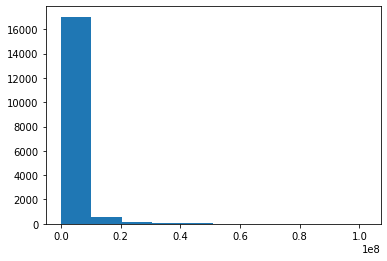

In [548]:
plt.hist(df['Value']);

there's a long tail in the distribution, so let's put it on a log scale instead


In [577]:
df['Value'].describe()

count    1.791100e+04
mean     2.424560e+06
std      5.440840e+06
min      0.000000e+00
25%      3.250000e+05
50%      7.000000e+05
75%      2.100000e+06
max      1.020000e+08
Name: Value, dtype: float64

''

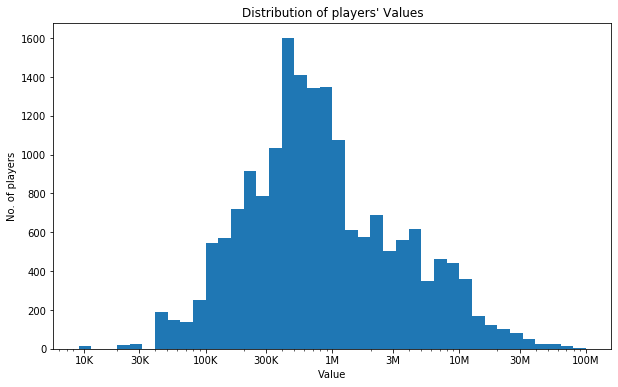

In [549]:
xticks = ['10K','30K','100K','300K',"1M","3M","10M","30M","100M"]
bins = 10 ** np.arange(4, 8+0.1, 0.1)

plt.figure(figsize=(10,6))
plt.hist(df['Value'], bins=bins)
plt.xscale('log')
plt.xticks([10**4+1000, 3*10**4, 10**5, 3*10**5, 10**6, 3*10**6, 10**7, 3*10**7, 10**8], xticks)
plt.title("Distribution of players' Values")
plt.xlabel("Value")
plt.ylabel("No. of players")
;

The disrtibution looks abit like normal disrtibution with most values betweem 300K and 1M. There are some few values that are separated (10K, and below 30K).

Now let's move to Wage variable.

''

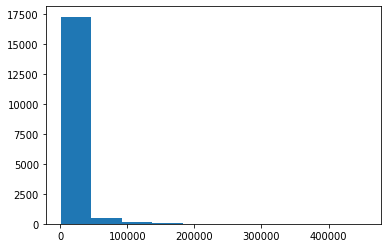

In [550]:
plt.hist(df['Wage'])
;

there's a long tail in the distribution, so let's put it on a log scale instead


''

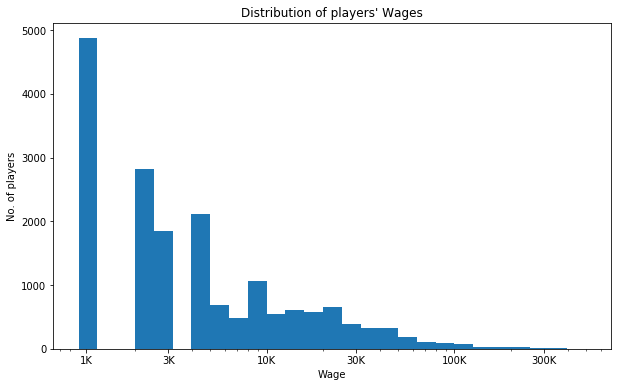

In [551]:
xticks = ['1K', '3K', '10K','30K','100K','300K']
bins = 10 ** np.arange(3, 5.65+0.1, 0.1)

plt.figure(figsize=(10,6))
plt.hist(df['Wage'], bins=bins)
plt.xscale('log')
plt.xticks([10**3+100, 3*10**3,10**4, 3*10**4, 10**5, 3*10**5], xticks)
plt.title("Distribution of players' Wages")
plt.xlabel("Wage")
plt.ylabel("No. of players")
;

What is interesting is that huge number of players take the same Wage (1K), and also some below 3K.

Next, the first predictor variable of interest: Overall.

In [552]:
# Looks at min/max to set our bins
df['Overall'].describe()

count    17911.000000
mean        66.228965
std          6.916823
min         46.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         91.000000
Name: Overall, dtype: float64

''

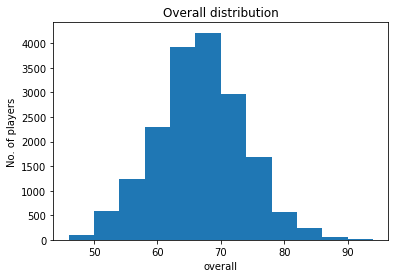

In [553]:
# Lets look at Overall distribution
b = np.arange(46, 94+4, 4)
plt.hist(df['Overall'], bins=b)
plt.title("Overall distribution")
plt.xlabel("overall")
plt.ylabel('No. of players')
;

It looks like a normal disrtibution, with most players overall around 65

Now, we can move to bodyType, Preferred Foot

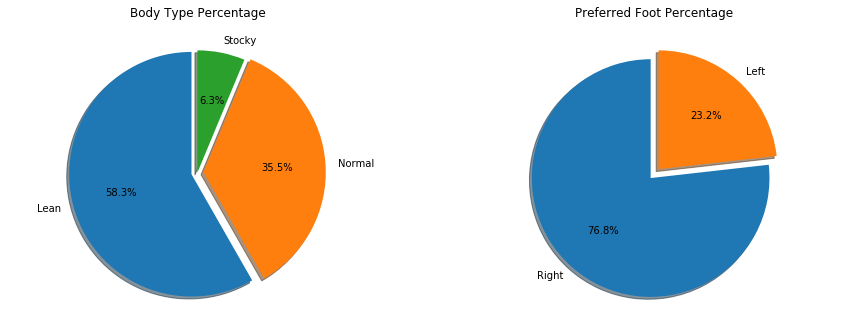

In [554]:
default_color = sb.color_palette()[0]

# Create 2 Pie plots
fig, ax = plt.subplots(ncols=2, figsize=(15,5))

# BodyType Pie
ax[0].pie(df['Body Type'].value_counts(),labels=df['Body Type'].unique(), autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.05,0.05,0))
ax[0].axis('equal')
ax[0].title.set_text("Body Type Percentage\n")

# PreferredFoot Pie
ax[1].pie(df['Preferred Foot'].value_counts(),labels=df['Preferred Foot'].unique(), autopct='%1.1f%%', shadow=True, startangle=90, explode=(0,0.1))
ax[1].axis('equal')
ax[1].title.set_text("Preferred Foot Percentage\n")

- It looks like the majority of players falls in Lean, followed by Normal, and only a few in Stocky
- The preferred foot for 76.8% of players is the riht foot

Let's look at position

''

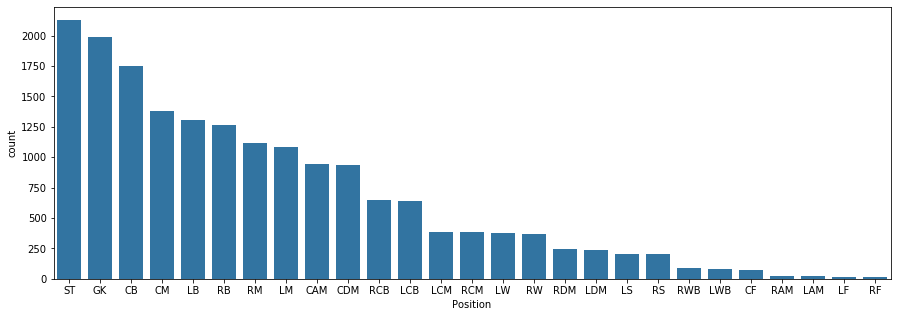

In [555]:
# Create Position barplot
plt.figure(figsize=(15,5))
position_order = df['Position'].value_counts().index
sb.countplot(data=df, x='Position', color=default_color, order=position_order)
;

Striker is the most common position

''

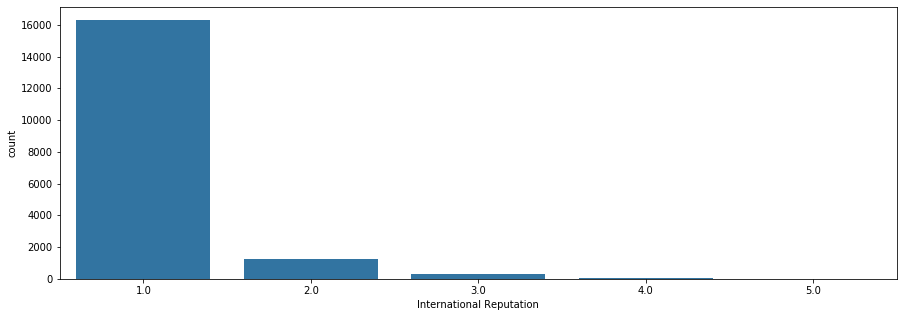

In [556]:
# Create Position barplot
plt.figure(figsize=(15,5))
position_order = df['International Reputation'].value_counts().index
sb.countplot(data=df, x='International Reputation', color=default_color, order=position_order)
;

''

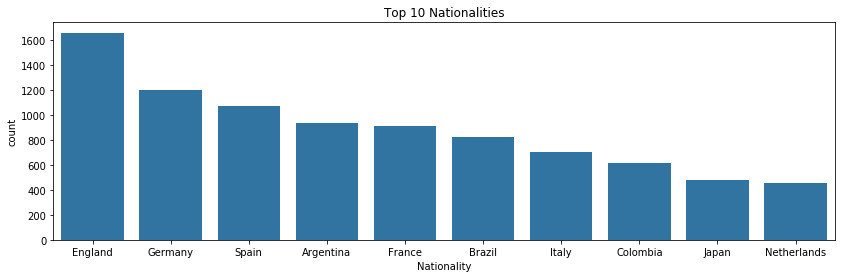

In [557]:
top10Nationalities = df['Nationality'].value_counts().head(10).index
df2 = df.loc[df['Nationality'].isin(list(top10Nationalities))]
# Create Top 10 nationalities barplot
plt.figure(figsize=(14,4))
sb.countplot(data=df2, x='Nationality', color=default_color, order=top10Nationalities)
plt.title('Top 10 Nationalities')
;

England is the most frequent Nationality among players.

Lets see some other variables.

''

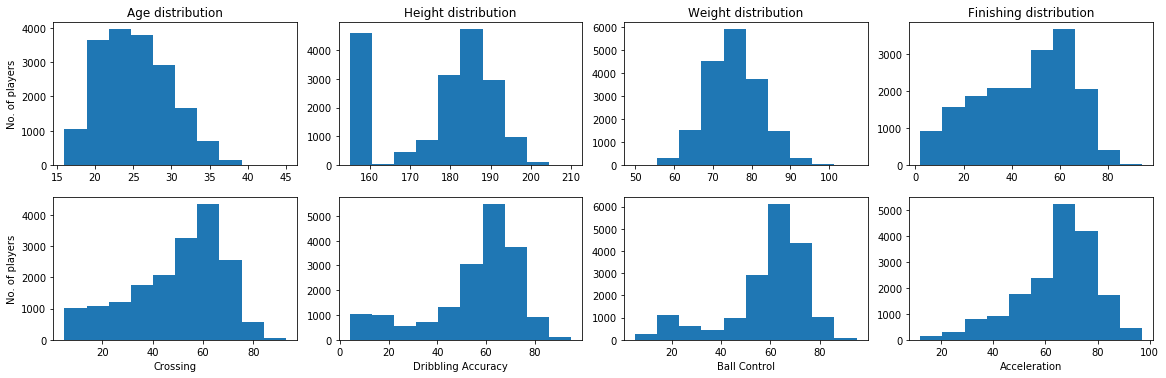

In [558]:
# Create subplots
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(16,5))
fig.tight_layout()

# Age
ax[0][0].hist(df['Age'], color='#1f77b4')
ax[0][0].title.set_text('Age distribution')
# ax[0][0].set_xlabel('Age')
ax[0][0].set_ylabel('No. of players')

# Height
ax[0][1].hist(df['Height'], color='#1f77b4')
ax[0][1].title.set_text('Height distribution')
# ax[0][1].set_xlabel('Height')

# Weight
ax[0][2].hist(df['Weight'], color='#1f77b4')
ax[0][2].title.set_text('Weight distribution')
# ax[0][2].set_xlabel('Weight')

# Finishing
ax[0][3].hist(df['Finishing'], color='#1f77b4')
ax[0][3].title.set_text('Finishing distribution')
# ax[0][3].set_xlabel('Finishing')

# Crossing
ax[1][0].hist(df['Crossing'], color='#1f77b4')
ax[1][0].set_xlabel('Crossing')
ax[1][0].set_ylabel('No. of players')

# Dribbling
ax[1][1].hist(df['Dribbling'], color='#1f77b4')
ax[1][1].set_xlabel('Dribbling Accuracy')

# Ball Control
ax[1][2].hist(df['BallControl'], color='#1f77b4')
ax[1][2].set_xlabel('Ball Control')

ax[1][3].hist(df['Acceleration'], color='#1f77b4')
ax[1][3].set_xlabel('Acceleration')
;

- in height many people are less than 160 cm, and very few people are between 160 and 15.

In [559]:
df.head()

,Name,Age,Nationality,Overall,Club,Preferred Foot,Body Type,Position,Height,Weight,Finishing,Dribbling,Crossing,BallControl,Acceleration,Wage,International Reputation,Reactions,Value
3,De Gea,27,Spain,91,Manchester United,Right,Lean,GK,195,76.20,13.0,18.0,17.0,42.0,57.0,260000,4.0,90.0,72000000.0
4,K. De Bruyne,27,Belgium,91,Manchester City,Right,Normal,RCM,156,69.85,82.0,86.0,93.0,91.0,78.0,355000,4.0,91.0,102000000.0
5,E. Hazard,27,Belgium,91,Chelsea,Right,Normal,LF,177,73.94,84.0,95.0,81.0,94.0,94.0,340000,4.0,90.0,93000000.0
6,L. Modrić,32,Croatia,91,Real Madrid,Right,Lean,RCM,177,66.22,72.0,90.0,86.0,93.0,80.0,420000,4.0,90.0,67000000.0
7,L. Suárez,31,Uruguay,91,FC Barcelona,Right,Normal,RS,183,86.18,93.0,87.0,77.0,90.0,86.0,455000,5.0,92.0,80000000.0


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- In Value variable, the numbers of players taking same salary varies alot, so I looked at the data using a log transform on the y axis. Under the transformation, the data looked right skewed, with most players' values less than 20M, and only one player value is 100M.
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?


- No, I didn't make any operations on the data, as all disributions looks normal.

## Bivariate Exploration


First of all, I want to look at the pairwise correlations present between features in the data.

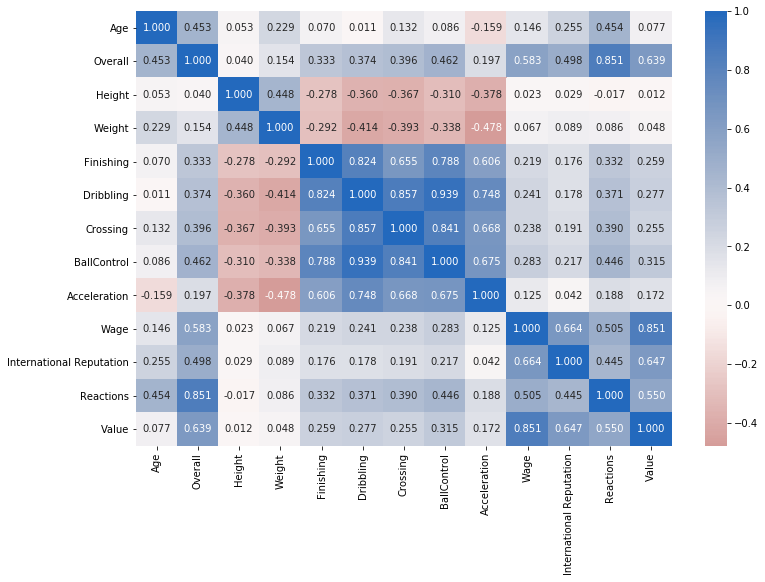

In [560]:
plt.figure(figsize = [12, 8])
sb.heatmap(df.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()


''

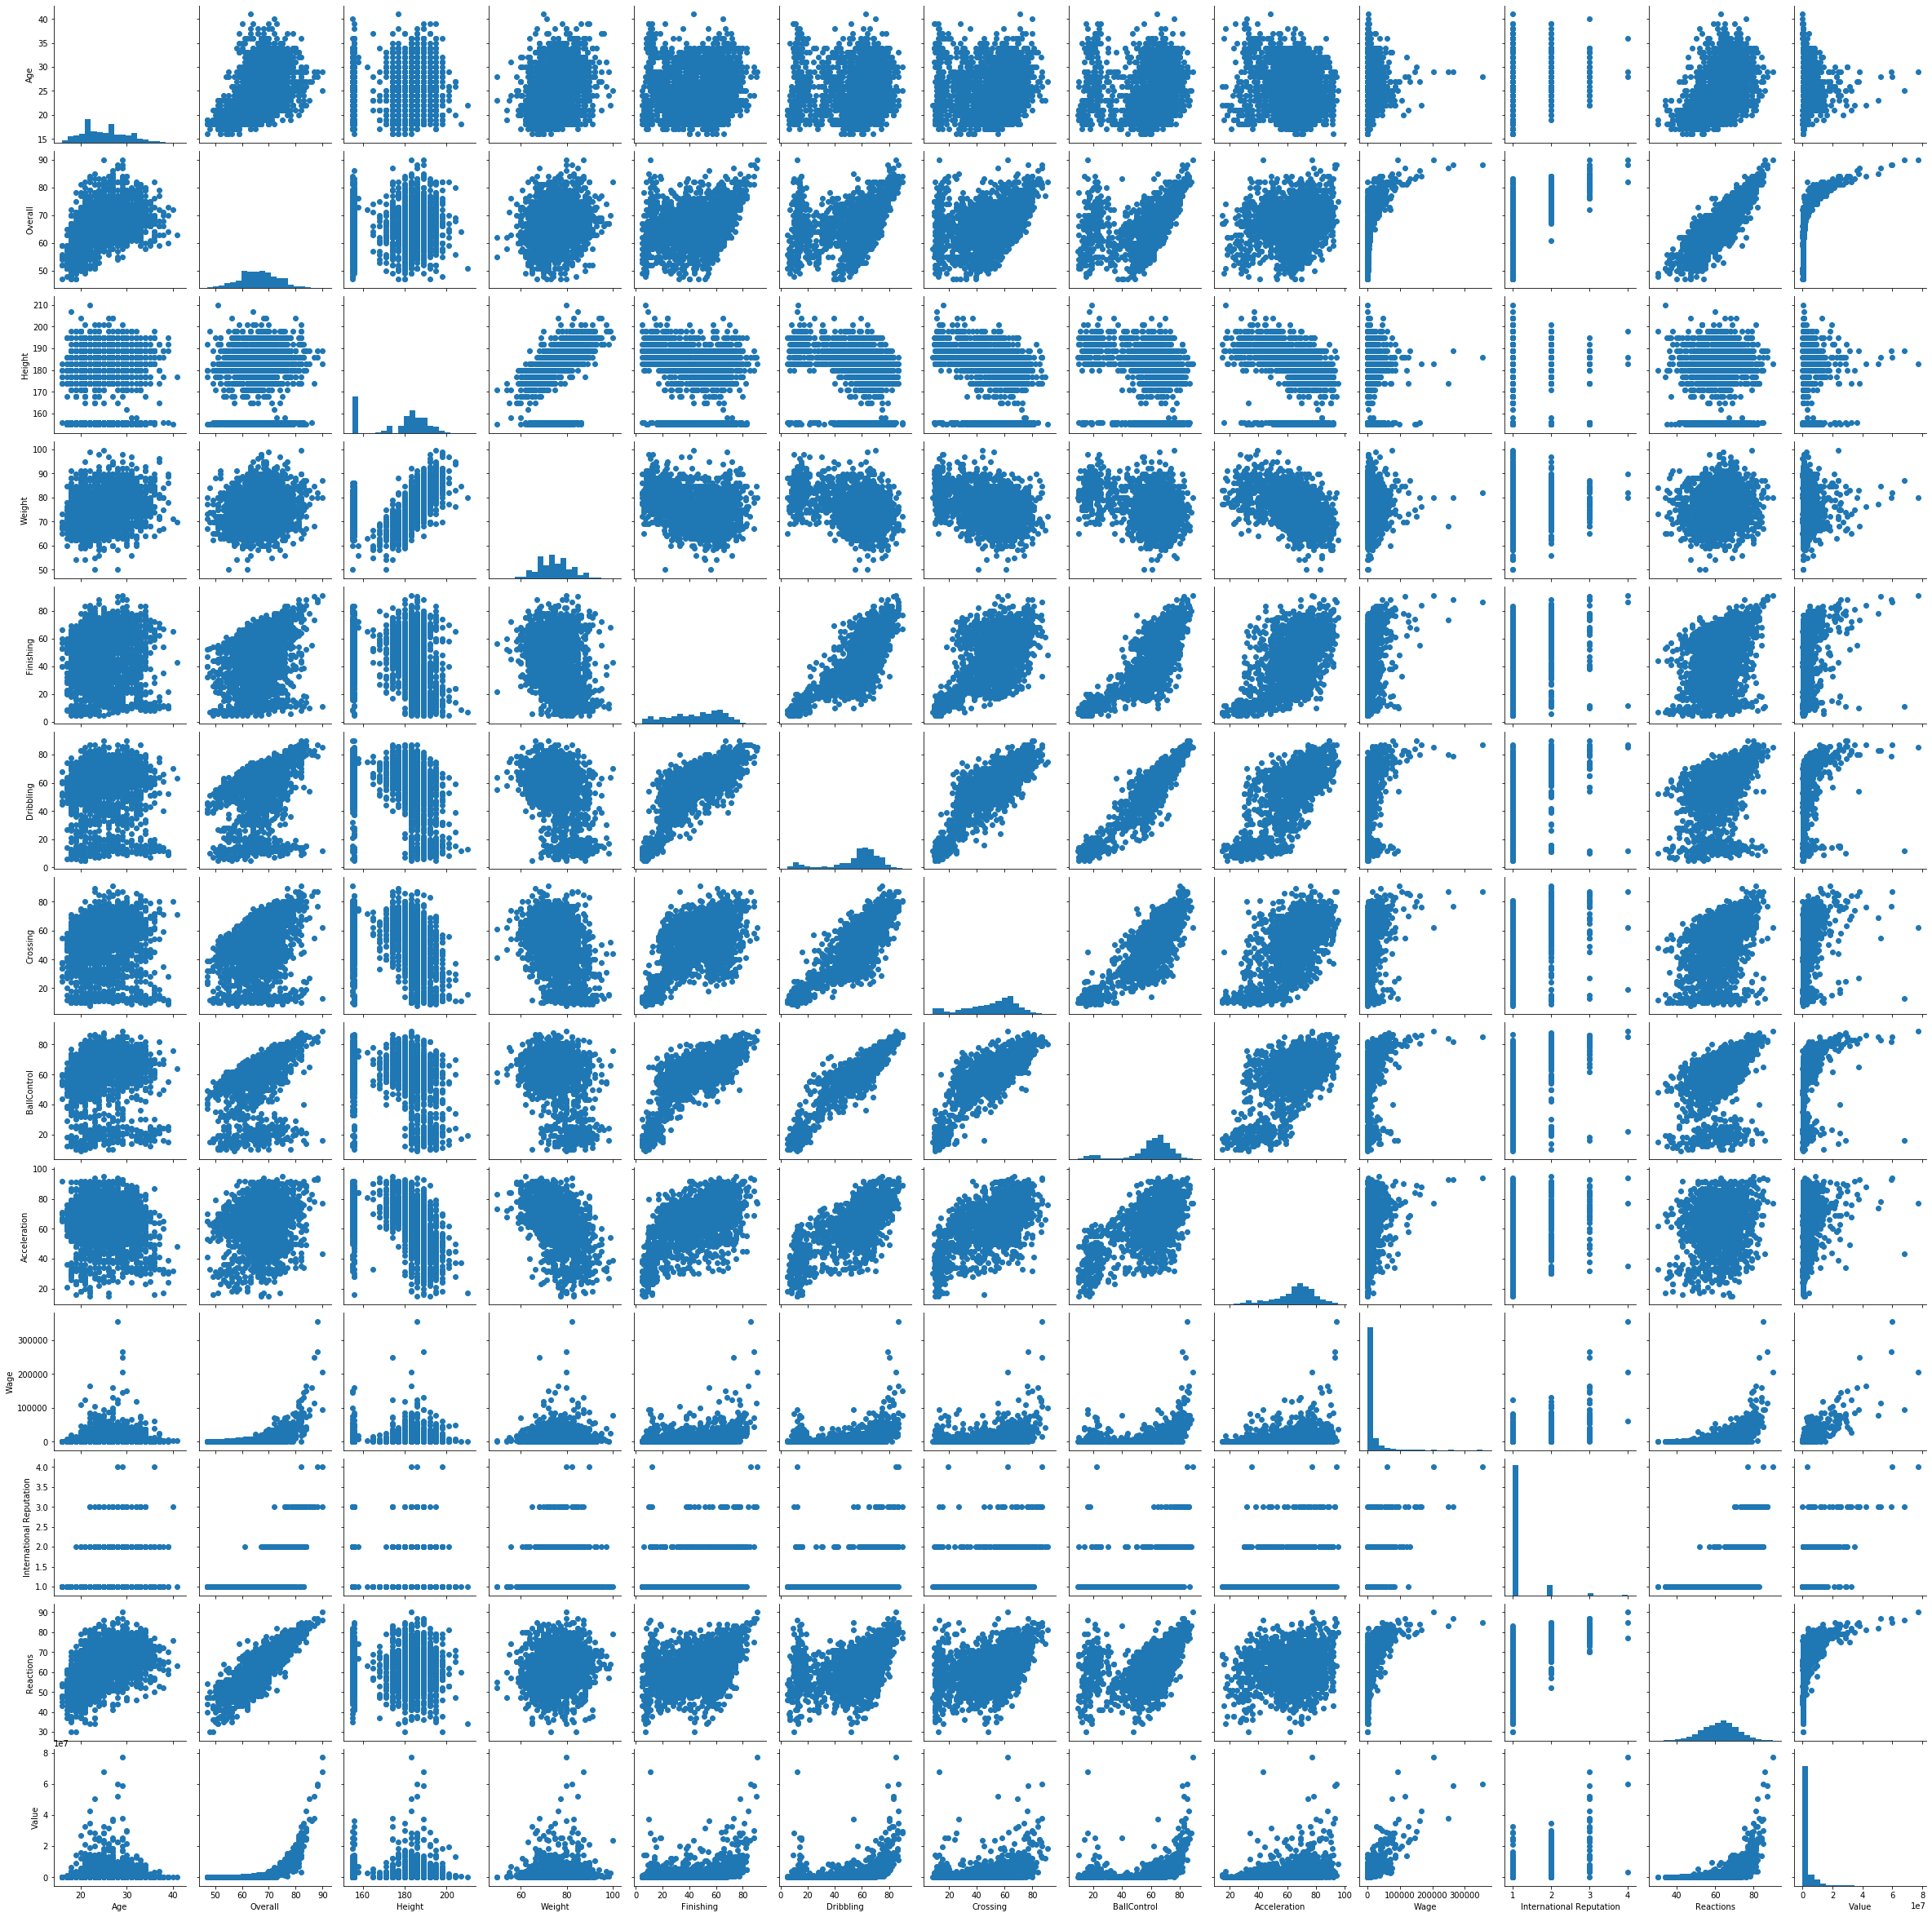

In [561]:
# We can take a sample to make it clear
df_sample = df.sample(2000)

g = sb.PairGrid(df_sample)
g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter)
;

Findings:
- as expected Overall is related to Value, and it look a quadratic relation
- Ball control, Finishing, and Dribbling also seems to relate to Value.
- Dribbling, Acceleration, ball control, crossing, and Finishing are all highly correlated with one another.
- Weight is correlated positively with Height.
- Weight is correlated negatively with Dribbling, Acceleration, ball control.

Lets look more closely at the Overall-Value relation.

''

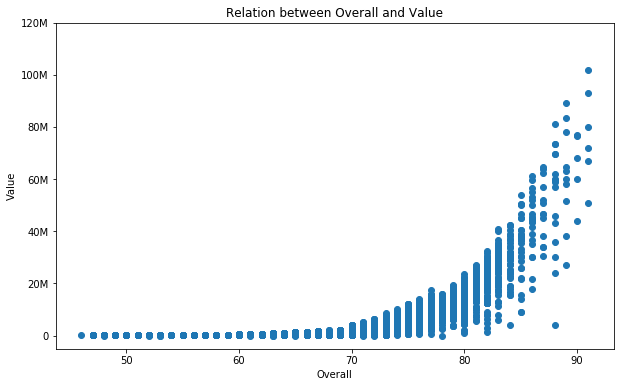

In [562]:
plt.figure(figsize=(10,6))
plt.scatter(data=df, x='Overall', y='Value')
plt.title("Relation between Overall and Value")
plt.yticks([0.0e+00,  2.0e+07,  4.0e+07,  6.0e+07,  8.0e+07,1.0e+08,  1.2e+08],
            ['0', '20M', '40M', '60M', '80M', '100M', '120M'])
plt.xlabel('Overall')
plt.ylabel('Value')
;

Overall is strongly related to Value.

Let's see the relation between Overall and Wage.

''

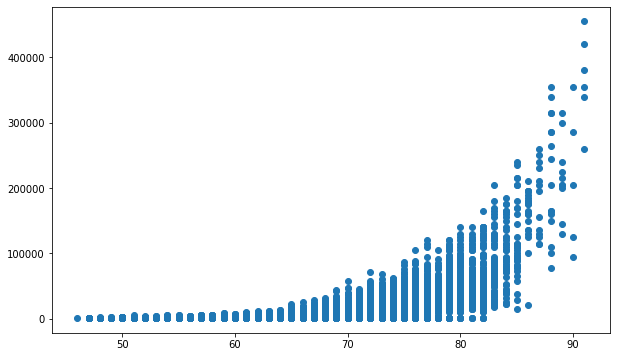

In [563]:
plt.figure(figsize=(10,6))
plt.scatter(df['Overall'], df['Wage'])
;

It's almost the same as the Value

''

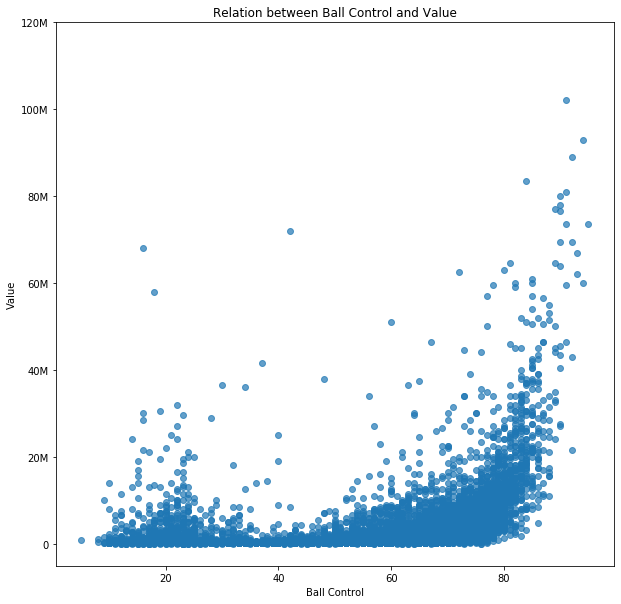

In [579]:
plt.figure(figsize=(10,10))
plt.scatter(data=df, x='BallControl', y='Value', alpha=0.7)
plt.title("Relation between Ball Control and Value")
plt.yticks([0.0e+00,  2.0e+07,  4.0e+07,  6.0e+07,  8.0e+07,1.0e+08,  1.2e+08],
            ['0', '20M', '40M', '60M', '80M', '100M', '120M'])
plt.xlabel('Ball Control')
plt.ylabel('Value')
;

Let's see how our categorical variables relate to player Value.

''

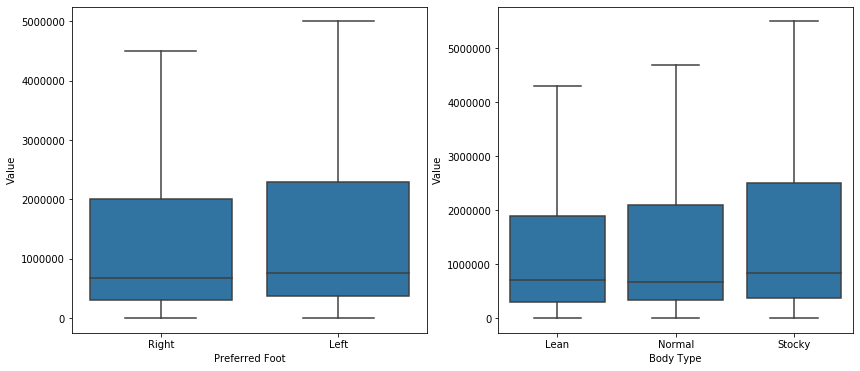

In [565]:
fig, ax = plt.subplots(ncols=2, figsize=(14,6))
sb.boxplot(data=df, x='Preferred Foot', y='Value',showfliers = False, color=default_color, ax=ax[0])
sb.boxplot(data=df, x='Body Type', y='Value', showfliers = False,color=default_color, ax=ax[1])
;

- It seems most Players who preffered  Left leg have a little higher values than Players who preffered right leg.
- The median of Stocky is greater than Normal, and Normal is little as same as Lean.

In [566]:
# Lets get position arder based on mean
position_order = df.groupby("Position").mean()['Value'].sort_values(ascending=False).index

''

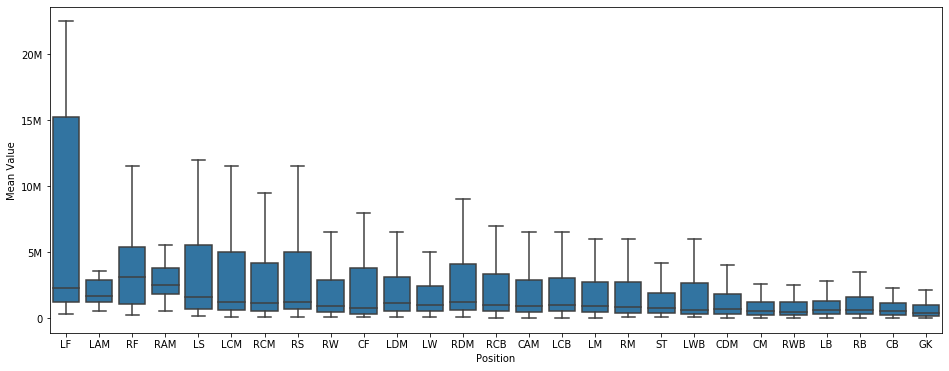

In [581]:
plt.figure(figsize=(16,6))
sb.boxplot(data=df, x='Position', y='Value',showfliers = False, color=default_color, order=position_order)
plt.yticks([0.0e+00,  0.5e+07,  1e+07,  1.5e+07,  2.0e+07],
            ['0', '5M', '10M', '15M', '20M'])
plt.ylabel("Mean Value")
;

Left forward players have the Highest values

Now Let's look at The relation between International Reputation and Value.

In [568]:
df['International Reputation']

3        4.0
4        4.0
5        4.0
6        4.0
7        5.0
        ... 
18202    1.0
18203    1.0
18204    1.0
18205    1.0
18206    1.0
Name: International Reputation, Length: 17911, dtype: float64

''

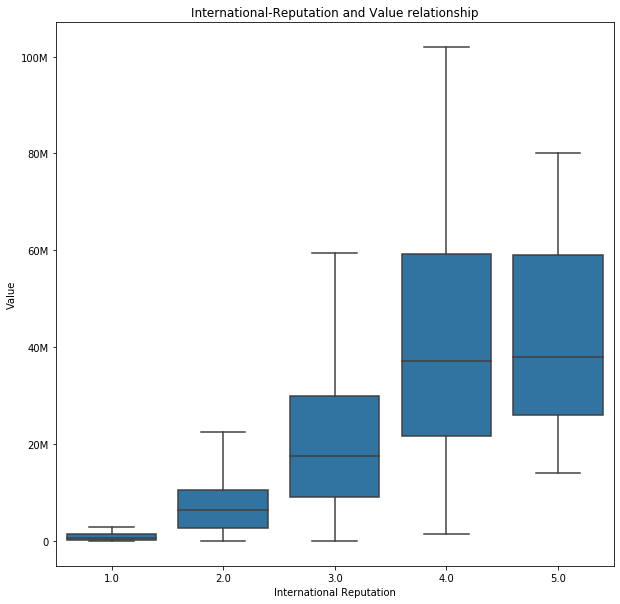

In [569]:
plt.figure(figsize=(10,10))
sb.boxplot(data=df, x='International Reputation', y='Value',showfliers = False, color=default_color)
plt.title("International-Reputation and Value relationship")
plt.yticks([0,  0.2e+08,  0.4e+08,  0.6e+08,  0.8e+08,  1e+08], ["0",  "20M",  "40M",  "60M",  "80M",  '100M'])
;

It appears that there is a positive relationship between International-Reputation and Value of player.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- Overall is strongly related with Value. An approximately quadratic relationship was observed when Value was  plotted on a log scale.
- International-Reputation and Value of player are strongly correlated.
- Body Type seems to have relation too with Price, Stoky has the highest Values
- Players using left leg have heigher values.
- Left Forward players are The most expensive players.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
- Overall has almost the same relation with Wage as with Value.
- Dribbling, Acceleration, ball control, crossing, and Finishing are all highly correlated with one another.
- Height and weight have a positive relationship
- Weight is negatively corelated with Acceleration


## Multivariate Exploration



The main thing to explore in this part of the analysis is how the the categorical variables play into the relationship between Overall and Value.

Let's start by International Reputation

/home/abdalla/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


''

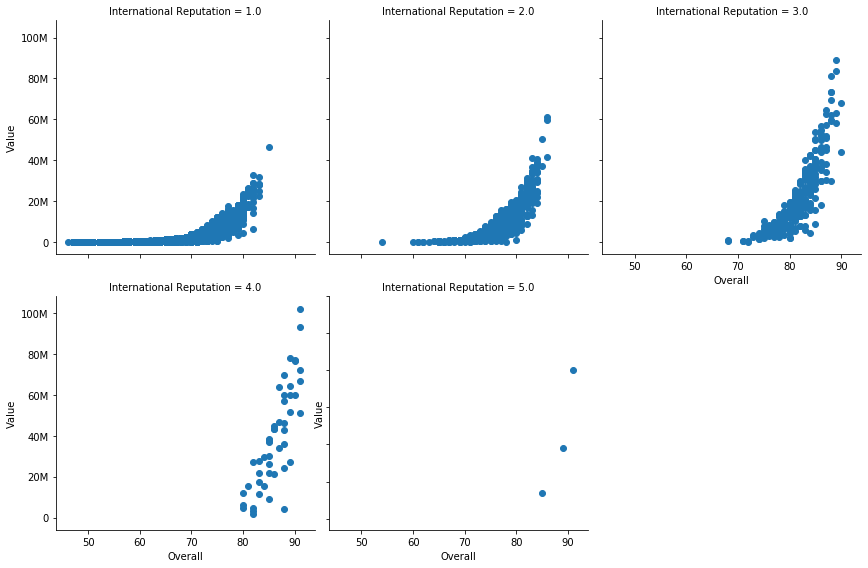

In [570]:
g = sb.FacetGrid(data=df, col='International Reputation', size=4, col_wrap=3)
g.map(plt.scatter, 'Overall', 'Value')
plt.yticks([0.0e+00,  2.0e+07,  4.0e+07,  6.0e+07,  8.0e+07,1.0e+08,  1.2e+08],
            ['0', '20M', '40M', '60M', '80M', '100M', '120M'])
plt.xlabel('Overall')
plt.ylabel('Value')
;

As the International Reputation increases, the Overall and Values increases.

Now we can look at Body Type

''

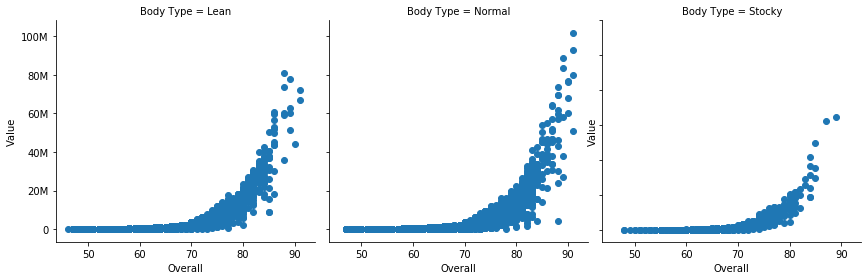

In [571]:
g = sb.FacetGrid(data=df, col='Body Type', size=4, col_wrap=3)
g.map(plt.scatter, 'Overall', 'Value')
plt.yticks([0.0e+00,  2.0e+07,  4.0e+07,  6.0e+07,  8.0e+07,1.0e+08,  1.2e+08],
            ['0', '20M', '40M', '60M', '80M', '100M', '120M'])
plt.xlabel('Overall')
plt.ylabel('Value')
;

Most Vauable players have Normal body Type.

Preferred Foot

''

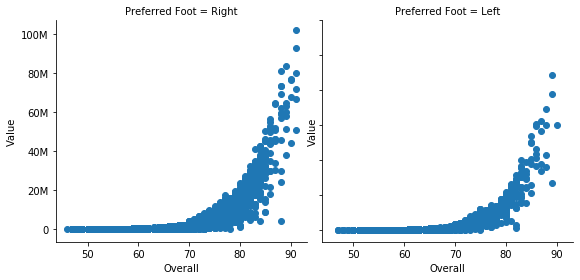

In [572]:
g = sb.FacetGrid(data=df, col='Preferred Foot', size=4, col_wrap=2)
g.map(plt.scatter, 'Overall', 'Value')
plt.yticks([0.0e+00,  2.0e+07,  4.0e+07,  6.0e+07,  8.0e+07,1.0e+08,  1.2e+08],
            ['0', '20M', '40M', '60M', '80M', '100M', '120M'])
plt.xlabel('Overall')
plt.ylabel('Value')
;

Let's see how Value correlate to Body Type and International Reputation

''

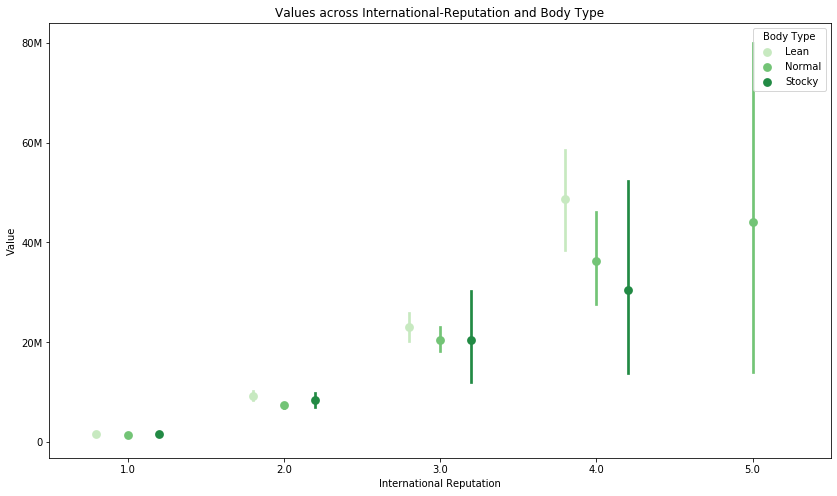

In [573]:
plt.figure(figsize=(14,8))
sb.pointplot(data=df, x='International Reputation', y='Value', palette = 'Greens',
             hue='Body Type', dodge = 0.4, linestyles="")
plt.title("Values across International-Reputation and Body Type")
plt.yticks([0,  0.2e+08,  0.4e+08,  0.6e+08,  0.8e+08], ["0",  "20M",  "40M",  "60M",  "80M"])
;

A dodged point plot shows the clear influence of International and Body Type on Player's Value. The larger error bars on the right side are due to there being fewer Players at higher International level.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- It's clear that International Reputation is related to Value positevly, and Body type affect this as LEan is greater than Normal, and Normal is greater than Stocky.
- Top paid player Prefere right foot.

### Were there any interesting or surprising interactions between features?

> Yes, It was interesting that at International Reputation 1,2,3 Stocky is quite similar to Lean, but at  International Reputation, Lean is higher than Stocky, And all players at 5 have Normal Body.